In [1]:
#Import basic libraries and Dataset

import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.graph_objs import *
import seaborn as sns

df_YT_GB = pd.read_csv('E:/IIT-C/Sem-III/Adv Data Analytics/New folder/GBvideos/GBvideos.csv');


c:\users\anantharaman chandar\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.



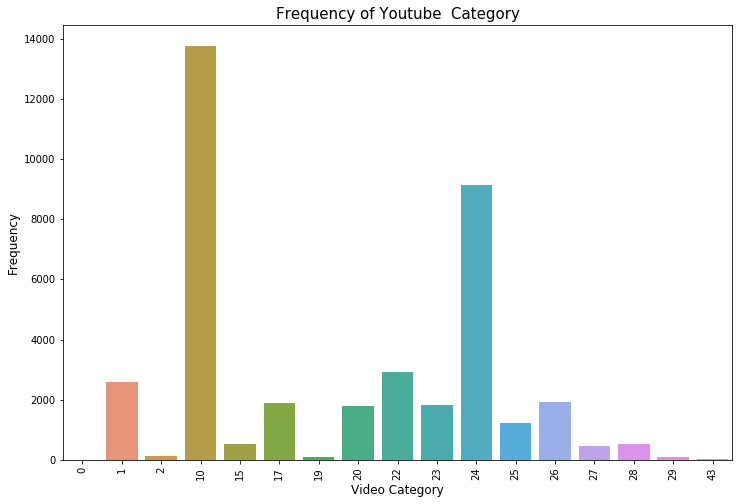

In [2]:
# Frequency distribution of the data based on category

plt.figure(figsize=(12,8))
sns.countplot(x="category_id", data=df_YT_GB)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Video Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Youtube  Category", fontsize=15)
plt.show()


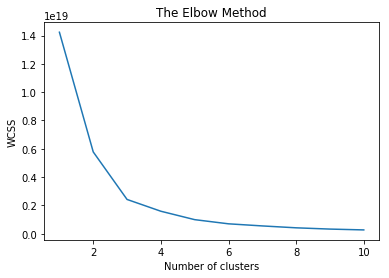

In [3]:
#Clustering before normalization

cluster = df_YT_GB[['likes','dislikes', 'views', 'comment_count']]
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

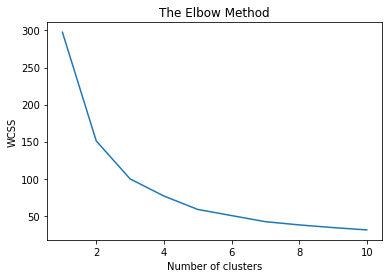

In [4]:
#Clustering after normalization and choosing no.of clusters to be passed

df2 = cluster.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
#No.of clusters passed is 5 and generating a 3D scatter plot between likes/comments/views

kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(df2)
df2['cluster']=y_kmeans

trace1 = go.Scatter3d(
    x = df2['likes'].values,
    y = df2['comment_count'].values,
    z = df2['views'].values,
    mode='markers',
    marker=dict(
        size=12,
        color=df2['cluster'].values,# set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
    
)

data = [trace1]
layout = go.Layout(
    scene=Scene(
        xaxis=XAxis(title='Likes'),
        yaxis=YAxis(title='Comment'),
        zaxis=ZAxis(title='Views')
        ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

c:\users\anantharaman chandar\appdata\local\programs\python\python36-32\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


c:\users\anantharaman chandar\appdata\local\programs\python\python36-32\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


c:\users\anantharaman chandar\appdata\local\programs\python\python36-32\lib\site-packages\plotly\graph_objs\_deprecations.py:582: DeprecationWarning:

plotly.graph_objs.ZAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.scene.ZAxis


c:\users\anantharaman chandar\appdata\l